# Animy Recommender system 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
df.keys()

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [4]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [12]:
df.groupby('genre')['rating'].mean().sort_values(ascending=False).head()

genre
Action, Adventure, Drama, Fantasy, Magic, Military, Shounen    9.26
Drama, Fantasy, Romance, Slice of Life, Supernatural           9.06
Drama, School, Shounen                                         9.05
Action, Drama, Mecha, Military, Sci-Fi, Super Power            8.98
Adventure, Drama, Supernatural                                 8.93
Name: rating, dtype: float64

In [13]:
df.groupby('genre')['rating'].count().sort_values(ascending=False).head()

genre
Hentai                   816
Comedy                   521
Music                    297
Kids                     197
Comedy, Slice of Life    174
Name: rating, dtype: int64

In [10]:
ratings = pd.DataFrame(df.groupby('genre')['rating'].mean())
ratings.head()

,rating
genre,
Action,5.815472
"Action, Adventure",6.187333
"Action, Adventure, Cars, Comedy, Sci-Fi, Shounen",6.865000
"Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports",6.460000
"Action, Adventure, Cars, Sci-Fi",6.860000


In [15]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('genre')['rating'].count())
ratings.head()

,rating,num of ratings
genre,,
Action,5.815472,53
"Action, Adventure",6.187333,15
"Action, Adventure, Cars, Comedy, Sci-Fi, Shounen",6.865000,2
"Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports",6.460000,1
"Action, Adventure, Cars, Sci-Fi",6.860000,1


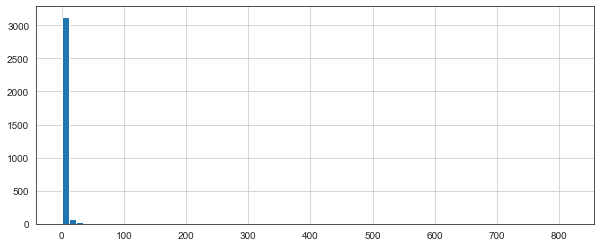

In [16]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

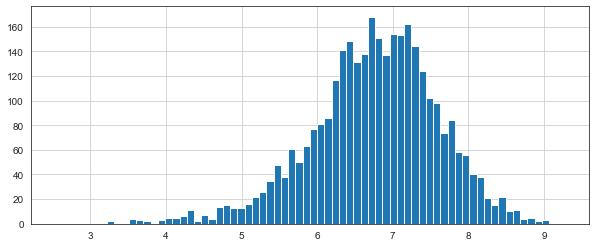

In [17]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

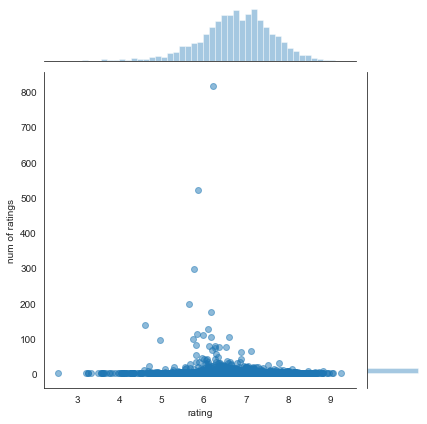

In [18]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [20]:
moviemat = df.pivot_table(index='anime_id',columns='genre',values='rating')
moviemat.head()

genre,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","Action, Adventure, Cars, Sci-Fi","Action, Adventure, Comedy","Action, Adventure, Comedy, Demons, Drama, Ecchi, Horror, Mystery, Romance, Sci-Fi","Action, Adventure, Comedy, Demons, Fantasy, Magic","Action, Adventure, Comedy, Demons, Fantasy, Magic, Romance, Shounen, Supernatural","Action, Adventure, Comedy, Demons, Fantasy, Martial Arts, Shounen, Super Power",...,Slice of Life,"Slice of Life, Space","Slice of Life, Supernatural",Space,Sports,"Super Power, Supernatural, Vampire",Supernatural,Thriller,Vampire,Yaoi
anime_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
genre,,
Hentai,6.227819,816
Comedy,5.852380,521
Music,5.756532,297
Kids,5.657157,197
"Comedy, Slice of Life",6.182241,174
Dementia,4.598467,137
"Fantasy, Kids",6.103516,128
"Comedy, Kids",5.846071,112
Fantasy,5.987636,110


In [22]:
ratings.head()

,rating,num of ratings
genre,,
Action,5.815472,53
"Action, Adventure",6.187333,15
"Action, Adventure, Cars, Comedy, Sci-Fi, Shounen",6.865000,2
"Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports",6.460000,1
"Action, Adventure, Cars, Sci-Fi",6.860000,1


In [24]:
starwars_user_ratings = moviemat['Hentai']
liarliar_user_ratings = moviemat['Comedy']
starwars_user_ratings.head()

anime_id
1   NaN
5   NaN
6   NaN
7   NaN
8   NaN
Name: Hentai, dtype: float64